In [91]:
import pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [92]:
word_level_comms = []
# for l in load_obj("main_cores"):
#     print(l)

for comm in load_obj("main_cores"):
    total = []
    for c in comm:
        total.extend(c.split(","))
    word_level_comms.append(total)
print(len(word_level_comms))

44


In [93]:
time_sweep = 5
path_to_raw = "../GDELT_actant_corr/ExtractedGDELTData/"
ordered_list = []
for root, dirs, files in os.walk(path_to_raw):
   for dirname in sorted(dirs):
        ordered_list.append(path_to_raw + dirname + "/into_relex.txt")

In [94]:
inspect_paths = []
for i in range(len(ordered_list) - time_sweep + 1):
    inspect_paths.append(ordered_list[i:i+time_sweep])

In [95]:
def extract_text(link):
    with open(link, 'r') as file:
        data = file.read().replace('\n', '')
    return data

total_corpi = []
for set_of_raw in inspect_paths:
    corpus = []
    for link in set_of_raw:
        corpus.extend(extract_text(link).lower().split())
    total_corpi.append(corpus)

In [96]:
def find_graph(corpus, comm):
    tot_sum = 0
    for word in comm:
        for c in corpus:
            if c == word:
                tot_sum += 1
    return tot_sum / (len(comm)*len(corpus))

traj = []
#for comm in word_level_comms:
for comm in [["5g","waves","antenna","radio","towers"],["army","us","bioweapon"],["lab","science","wuhan"],["jews"]]:
    total_data = []
    for corpus in total_corpi:
        data = find_graph(corpus, comm)
        total_data.append(data)
    traj.append(total_data)

In [97]:
from datetime import datetime, timedelta
def to_date(DATE):
    return datetime.strptime(DATE, '%Y%m%d%H%M%S')

def from_date(DATE):
    return DATE.strftime("%Y%m%d%H%M%S")

def create_range(DATE):
    list_dates = []
    for i in range(106 - time_sweep):
        list_dates.append((DATE + timedelta(days = i)).date())
    return list_dates

def create_range_2(DATE):
    list_dates = []
    for i in range(105):
        list_dates.append((DATE + timedelta(days = i)).date())
    return list_dates

Text(0, 0.5, 'Fraction of Words')

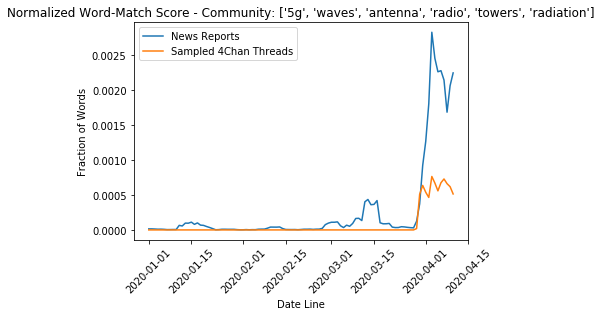

In [98]:
# Community Trends in the News Report
# Cross Correlation in Time and find the delay parameter?
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

date = to_date("20200101000001")
l_d = create_range(date)
l_d2 = create_range_2(date)

chan4 = pd.read_csv("all.csv")
dates = []
texts = []

dictionary_of_text = defaultdict(list)
for row in chan4.iterrows():
    try:
        dictionary_of_text[datetime.fromtimestamp(row[1]["date_utc"]).date()].append(str(row[1]["text"]))
    except:
        continue

traj_soc = []
communities = [["5g","waves","antenna","radio","towers","radiation"],["army","us","bioweapon"],["lab","science","wuhan"],["jews"]]
for comm in communities:
    total_data = []
    for k,l in enumerate(l_d2[:-time_sweep+1]):
    #for k,l in enumerate(l_d2):
        corpus = []

        for j in range(k, k + time_sweep):
            corp = (" ".join(dictionary_of_text[l_d2[j]])).lower().split(" ")
            corpus.extend(corp)
 
        if corpus == []:
            data = 0
        else:
            data = find_graph(corpus, comm)
        total_data.append(data)
    traj_soc.append(total_data)

index = 0
for l in [index]: 
    plt.plot(l_d, traj[l], label ="News Reports")
    plt.plot(l_d, traj_soc[l], label="Sampled 4Chan Threads")

plt.legend()


plt.xticks(rotation=45)


plt.title("Normalized Word-Match Score - Community: " + str(communities[index]))
plt.xlabel("Date Line")
plt.ylabel("Fraction of Words")

Text(0, 0.5, 'Number of Words')

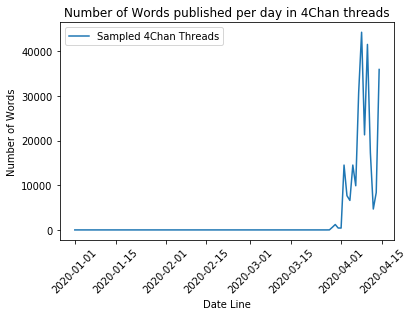

In [99]:
activity = []
for j, lp in enumerate(l_d2):
    corp = (" ".join(dictionary_of_text[lp])).lower().split(" ")
    activity.append(len(corp))

plt.plot(l_d2, activity, label="Sampled 4Chan Threads")
plt.legend()
plt.xticks(rotation=45)
plt.title("Number of Words published per day in 4Chan threads")
plt.xlabel("Date Line")
plt.ylabel("Number of Words")

In [100]:
# Conditional occurence of actants
import re
#list_of_actants = ["qanon","donald trump", "conspiracy theory", "5g", "waves"]
path = "../GDELT_actant_corr/Results0423/communities.txt"
a = b = c = 0

actant1 = "qanon"
actant2 = "donald trump"

with open(path) as f:
    list_lines = f.readlines()
    for l in list_lines:
        match  = re.findall(r'{(.+?)}', l)
        for m in match:
            words = m.split(", ")
            for word in words:
                if "qanon" in words and "donald trump" in words:
                    a += 1
                elif "qanon" in words:
                    b += 1
                elif "donald trump" in words:
                    c += 1

print("Probability of Communal Sharing: " + actant1 + " | " + actant2, a / b)
print("Probability of Communal Sharing: " + actant2 + " | " + actant1, a / c)

Probability of Communal Sharing: qanon | donald trump 0.38333333333333336
Probability of Communal Sharing: donald trump | qanon 0.10087719298245613


Text(0, 0.5, 'Number of Common Neighbors')

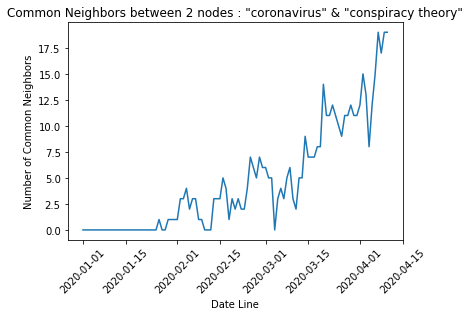

In [103]:
# Number of Distinct simple paths between two nodes (coronavirus, conspiracy theory)
path = "../GDELT_actant_corr/Results0423/simple_path.txt"
with open(path) as f:
    g = f.readlines()
    simple_paths = [int(gi) for gi in g]

plt.plot(l_d, simple_paths)
plt.title("Common Neighbors between 2 nodes : \"coronavirus\" & \"conspiracy theory\"")
plt.xticks(rotation=45)
plt.xlabel("Date Line")
plt.ylabel("Number of Common Neighbors")